# ODI Cricket Prdiction Of India-1

In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt 
import seaborn as sn                   # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [3]:
match=pd.read_csv('IndiaMatches.csv')

In [4]:
match.head(2)

,Team1,Team2,Ground,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,year,Day,Victory
0,India,New Zealand,Manchester,New Zealand,England,Neutral,Neutral,First,Second,1975,Saturday,batting second
1,India,West Indies,Birmingham,West Indies,England,Neutral,Neutral,First,Second,1979,Saturday,batting second


In [5]:
match.shape #number of rows and columns

(855, 12)

In [6]:
match.dtypes 

Team1            object
Team2            object
Ground           object
Winner           object
Host_Country     object
Venue_Team1      object
Venue_Team2      object
Innings_Team1    object
Innings_Team2    object
year              int64
Day              object
Victory          object
dtype: object

In [7]:
match['Winner'].value_counts() 

India           461
Australia        69
Pakistan         69
West Indies      59
Sri Lanka        54
New Zealand      44
South Africa     43
England          39
Zimbabwe         10
Bangladesh        5
Kenya             2
Name: Winner, dtype: int64

# Let's do some analysis of the matches

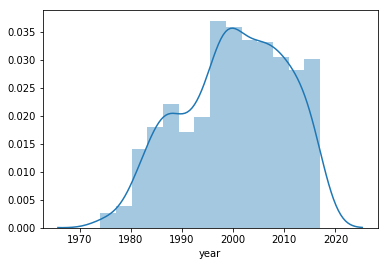

In [10]:
sn.distplot(match["year"])

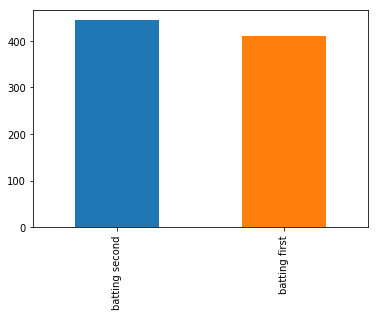

In [13]:
match['Victory'].value_counts().plot.bar()

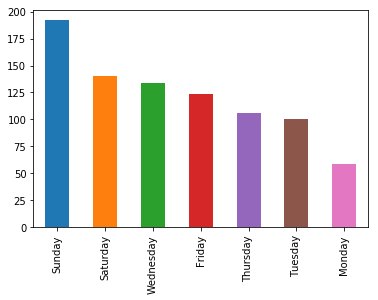

In [14]:
match['Day'].value_counts().plot.bar()

In [15]:
print(pd.crosstab(match['Victory'],match['Winner'])) 

Winner          Australia  Bangladesh  England  India  Kenya  New Zealand  \
Victory                                                                     
batting first          39           2       18    206      2           20   
batting second         30           3       21    255      0           24   

Winner          Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwe  
Victory                                                                   
batting first         42            23         26           28         5  
batting second        27            20         28           31         5  


###### Since this is the dataset of matches played by india therefore india has this many wins and loses

In [16]:
print(pd.crosstab(match['Day'],match['Winner']))

Winner     Australia  Bangladesh  England  India  Kenya  New Zealand  \
Day                                                                    
Friday            11           1        8     54      0            5   
Monday             3           0        5     35      0            1   
Saturday           6           1        5     80      0           10   
Sunday            22           2        6     99      0           10   
Thursday           9           1        5     60      1            8   
Tuesday           11           0        5     53      0            5   
Wednesday          7           0        5     80      1            5   

Winner     Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwe  
Day                                                                  
Friday           22             7          8            5         3  
Monday            4             2          2            7         0  
Saturday          9             3         12           13         1  
S

In [17]:
print(pd.crosstab(match['Host_Country'],match['Winner']))

Winner        Australia  Bangladesh  England  India  Kenya  New Zealand  \
Host_Country                                                              
Australia            35           0        3     37      0            5   
Bangladesh            0           4        0     29      0            0   
Canada                0           0        0      9      0            0   
England               2           0       19     35      0            3   
India                22           0       16    179      1            8   
Ireland               0           0        0      3      0            0   
Kenya                 0           0        0      6      0            1   
Malaysia              1           0        0      1      0            0   
Netherlands           0           0        0      0      0            0   
New Zealand           2           0        0     14      0           21   
Pakistan              0           0        0     14      0            0   
Scotland              0  

In [46]:
match.replace(['India','Australia','New Zealand','Sri Lanka','West Indies',
                 'South Africa','Bangladesh','England','Pakistan',
                 'Zimbabwe','Kenya','Afghanistan','Hong Kong','Scotland','Ireland','Bermuda','Namibia','Netherlands','U.A.E.','Malaysia','Canada','East Africa']
                ,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])

match.head(2)

,Team1,Team2,Ground,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,year,Day,Victory
0,1,3,Manchester,3,8,Neutral,Neutral,First,Second,1975,Saturday,batting second
1,1,5,Birmingham,5,8,Neutral,Neutral,First,Second,1979,Saturday,batting second


In [20]:
dicVal = TeamCode['Winner']
print(dicVal['Ind']) #print value from key
print(list(dicVal.keys())[list(dicVal.values()).index(5)])#find key by value
print(dicVal)

1
WI
{'Ind': 1, 'Aus': 2, 'NZ': 3, 'SL': 4, 'WI': 5, 'SA': 6, 'Ban': 7, 'Eng': 8, 'Pak': 9, 'Zim': 10, 'Ken': 11, 'Afg': 12, 'HK': 13, 'Sco': 14, 'Ire': 15, 'Ber': 16, 'Nam': 17, 'Net': 18, 'Uae': 19, 'Mal': 20, 'can': 21, 'Ea': 22}


###### We have assign each team a number (manually) for our further preocessing

In [47]:
df=match.loc[match['Host_Country'] == 8] # host country as England(8)

In [48]:
df.head()

,Team1,Team2,Ground,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,year,Day,Victory
0,1,3,Manchester,3,8,Neutral,Neutral,First,Second,1975,Saturday,batting second
1,1,5,Birmingham,5,8,Neutral,Neutral,First,Second,1979,Saturday,batting second
2,1,3,Leeds,3,8,Neutral,Neutral,First,Second,1979,Wednesday,batting second
3,1,4,Manchester,4,8,Neutral,Neutral,Second,First,1979,Saturday,batting first
15,1,5,Manchester,1,8,Neutral,Neutral,First,Second,1983,Thursday,batting first


In [49]:
df.shape

(66, 12)

In [50]:
df=df.drop('Innings_Team2',axis=1) #Dropping innings column

In [51]:
df=df.drop('Innings_Team1',axis=1) #Dropping innings column

In [52]:
df=df.drop('year',axis=1) #Dropping year column

In [53]:
df.head()

,Team1,Team2,Ground,Winner,Host_Country,Venue_Team1,Venue_Team2,Day,Victory
0,1,3,Manchester,3,8,Neutral,Neutral,Saturday,batting second
1,1,5,Birmingham,5,8,Neutral,Neutral,Saturday,batting second
2,1,3,Leeds,3,8,Neutral,Neutral,Wednesday,batting second
3,1,4,Manchester,4,8,Neutral,Neutral,Saturday,batting first
15,1,5,Manchester,1,8,Neutral,Neutral,Thursday,batting first


In [54]:
df['Ground'].value_counts()

The Oval           14
Birmingham         10
Manchester          8
Leeds               8
Lord's              6
Nottingham          5
Cardiff             4
Southampton         3
Bristol             3
Leicester           2
Taunton             1
Chelmsford          1
Tunbridge Wells     1
Name: Ground, dtype: int64

In [67]:
s=set(df['Ground']) #Giving each category of ground a discrete value 
val=0
for i in (s):
    df['Ground'].replace(i, val,inplace=True)
    val+=1

In [68]:
df['Ground'].value_counts()

7     14
11    10
5      8
0      8
4      6
10     5
9      4
2      3
1      3
6      2
12     1
8      1
3      1
Name: Ground, dtype: int64

In [72]:
df['Venue_Team1'].replace('Neutral', 0,inplace=True)
df['Venue_Team1'].replace('Away', 1,inplace=True)
df['Venue_Team1'].replace('Home', 2,inplace=True)

df['Venue_Team2'].replace('Neutral', 0,inplace=True)
df['Venue_Team2'].replace('Away', 1,inplace=True)
df['Venue_Team2'].replace('Home', 2,inplace=True)

In [74]:
df['Day'].replace('Sunday', 0,inplace=True)
df['Day'].replace('Monday', 1,inplace=True)
df['Day'].replace('Tuesday', 2,inplace=True)
df['Day'].replace('Wednesday', 3,inplace=True)
df['Day'].replace('Thursday', 4,inplace=True)
df['Day'].replace('Friday', 5,inplace=True)
df['Day'].replace('Saturday', 6,inplace=True)

###### We are replacing every categorical data with a number manually

In [76]:
df['Victory'].replace('batting second',0,inplace=True)
df['Victory'].replace('batting first',1,inplace=True)

In [77]:
df.head(5)

,Team1,Team2,Ground,Winner,Host_Country,Venue_Team1,Venue_Team2,Day,Victory
0,1,3,5,3,8,0,0,6,0
1,1,5,11,5,8,0,0,6,0
2,1,3,0,3,8,0,0,3,0
3,1,4,5,4,8,0,0,6,1
15,1,5,5,1,8,0,0,4,1


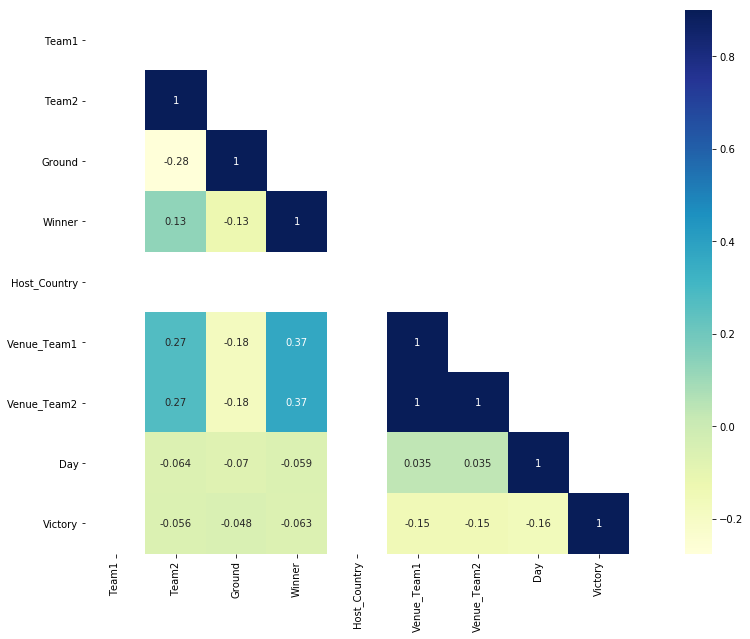

In [78]:
#Finding Correlation
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

## So Venue are the ones that actually matters in  a win rather than ground

In [79]:
df.isnull().sum() # Checking if any row contains a null entry

Team1           0
Team2           0
Ground          0
Winner          0
Host_Country    0
Venue_Team1     0
Venue_Team2     0
Day             0
Victory         0
dtype: int64

In [80]:
target=df['Winner']
df=df.drop('Winner',1)
df=df.drop('Victory',1)

In [81]:
train=pd.get_dummies(df)

In [82]:
from sklearn.model_selection import train_test_split
# splitting into train and validation with 20% data in validation set and 80% data in train set.
X_train, X_val, y_train, y_val = train_test_split(train, target, test_size = 0.2, random_state=12)

In [83]:
from sklearn.linear_model import LogisticRegression
# defining the logistic regression model
lreg = LogisticRegression()
# fitting the model on  X_train and y_train
lreg.fit(X_train,y_train)
# making prediction on the validation set
prediction = lreg.predict(X_val)

In [84]:
from sklearn.metrics import accuracy_score
# calculating the accuracy score
accuracy_score(y_val, prediction)

0.5714285714285714

In [85]:
from sklearn.tree import DecisionTreeClassifier
# defining the decision tree model with depth of 6, you can tune it further to improve the accuracy score
clf = DecisionTreeClassifier(max_depth=6, random_state=0)
# fitting the decision tree model
clf.fit(X_train,y_train)
# making prediction on the validation set
predict = clf.predict(X_val)

In [86]:
# calculating the accuracy score
accuracy_score(y_val, predict)

0.6428571428571429

In [91]:
df.tail()

,Team1,Team2,Ground,Host_Country,Venue_Team1,Venue_Team2,Day
824,1,8,9,8,1,2,3
825,1,8,10,8,1,2,6
826,1,8,11,8,1,2,2
827,1,8,0,8,1,2,5
847,1,7,11,8,0,0,4


In [115]:
test=pd.read_csv("WorldCup.csv")

In [116]:
test = pd.get_dummies(test)

In [117]:
test_prediction = clf.predict(test)

In [118]:
print(list(dicVal.keys())[list(dicVal.values()).index(test_prediction)])#finding key i.e team name from value

Ind


## In the worldcup.csv contains ind vs pak of 18th june in  manchester

# So our model with 64% accuracy (which is quiet less but still better than humans) predicted that india will win that match 